In [2]:
import pandas as pd

In [3]:
import numpy as np

In [4]:
import matplotlib.pyplot as plt

In [5]:
import seaborn as sns

In [6]:
# loading the dataset

In [7]:
file = "/Users/s.v.ssaisreenivas/Datasets/stocks.csv"

In [8]:
data = pd.read_csv(file)

In [9]:
# Basic info

In [10]:
print("Data head :\n", data.head())
print("Data tail :\n", data.tail())
print("\nData info:\n")
data.info()
print("\nMissing values:\n", data.isnull().sum())

Data head :
   Ticker        Date        Open        High         Low       Close  \
0   AAPL  2023-02-07  150.639999  155.229996  150.639999  154.649994   
1   AAPL  2023-02-08  153.880005  154.580002  151.169998  151.919998   
2   AAPL  2023-02-09  153.779999  154.330002  150.419998  150.869995   
3   AAPL  2023-02-10  149.460007  151.339996  149.220001  151.009995   
4   AAPL  2023-02-13  150.949997  154.259995  150.919998  153.850006   

    Adj Close    Volume  
0  154.414230  83322600  
1  151.688400  64120100  
2  150.639999  56007100  
3  151.009995  57450700  
4  153.850006  62199000  
Data tail :
     Ticker        Date        Open        High         Low       Close  \
243   GOOG  2023-05-01  107.720001  108.680000  107.500000  107.709999   
244   GOOG  2023-05-02  107.660004  107.730003  104.500000  105.980003   
245   GOOG  2023-05-03  106.220001  108.129997  105.620003  106.120003   
246   GOOG  2023-05-04  106.160004  106.300003  104.699997  105.209999   
247   GOOG  202

In [11]:
# convert date to date-time format

In [12]:
data["Date"] = pd.to_datetime(data["Date"])

In [13]:
# printing datatypes and unique companies

In [14]:
print("Data types:\n", data.dtypes)
print("\nUnique companies:", data["Ticker"].unique())

Data types:
 Ticker               object
Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
dtype: object

Unique companies: ['AAPL' 'MSFT' 'NFLX' 'GOOG']


In [15]:
# Group data by companies

In [16]:
grouped_data = data.groupby("Ticker")

In [17]:
# Basic stats

In [18]:
stats = grouped_data["Close"].agg(["mean", "median", "std"])

In [19]:
print("Basic stats for each company:\n", stats)

Basic stats for each company:
               mean      median        std
Ticker                                   
AAPL    158.240645  158.055000   7.360485
GOOG    100.631532  102.759998   6.279464
MSFT    275.039839  275.810013  17.676231
NFLX    327.614677  325.600006  18.554419


In [20]:
# plotting stock prices over time for each company

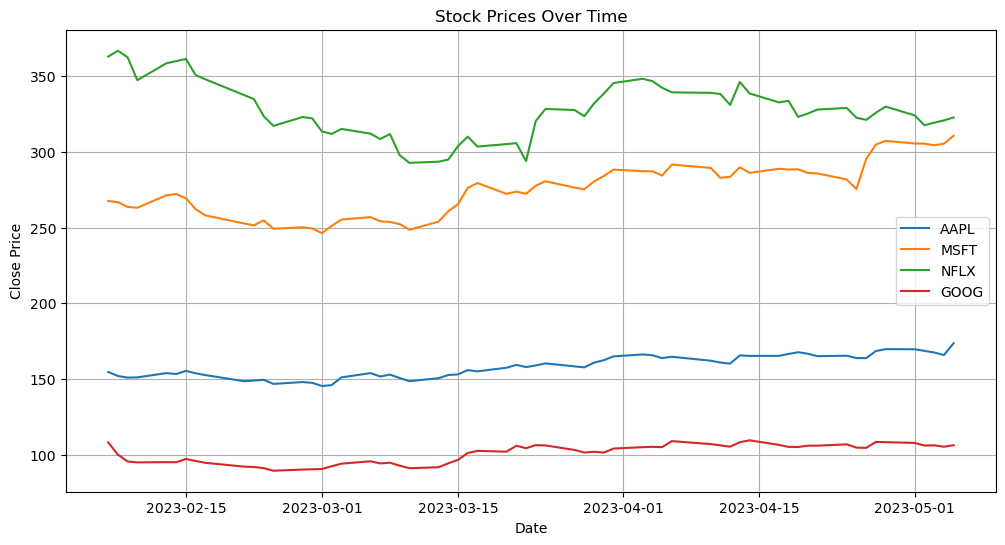

In [21]:
plt.figure(figsize=(12,6))
for ticker in data["Ticker"].unique():
    company_data = data[data["Ticker"] == ticker]
    plt.plot(company_data["Date"], company_data["Close"], label=ticker)

plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# calculating daily returns

In [23]:
data['Daily Return'] = data.groupby('Ticker')['Close'].pct_change()
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
0,AAPL,2023-02-07,150.639999,155.229996,150.639999,154.649994,154.414230,83322600,NaN
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-0.017653
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-0.006912
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,0.000928
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,0.018807


In [24]:
data.dropna(inplace = True)
data.head()

,Ticker,Date,Open,High,Low,Close,Adj Close,Volume,Daily Return
1,AAPL,2023-02-08,153.880005,154.580002,151.169998,151.919998,151.688400,64120100,-0.017653
2,AAPL,2023-02-09,153.779999,154.330002,150.419998,150.869995,150.639999,56007100,-0.006912
3,AAPL,2023-02-10,149.460007,151.339996,149.220001,151.009995,151.009995,57450700,0.000928
4,AAPL,2023-02-13,150.949997,154.259995,150.919998,153.850006,153.850006,62199000,0.018807
5,AAPL,2023-02-14,152.119995,153.770004,150.860001,153.199997,153.199997,61707600,-0.004225


In [25]:
# Measuring stock Volatilility

In [26]:
volatility = data.groupby('Ticker')['Daily Return'].std()
print("Stock Volatility (Standard Deviation of Daily Returns):\n", volatility)

Stock Volatility (Standard Deviation of Daily Returns):
 Ticker
AAPL    0.014152
GOOG    0.020710
MSFT    0.017881
NFLX    0.022481
Name: Daily Return, dtype: float64


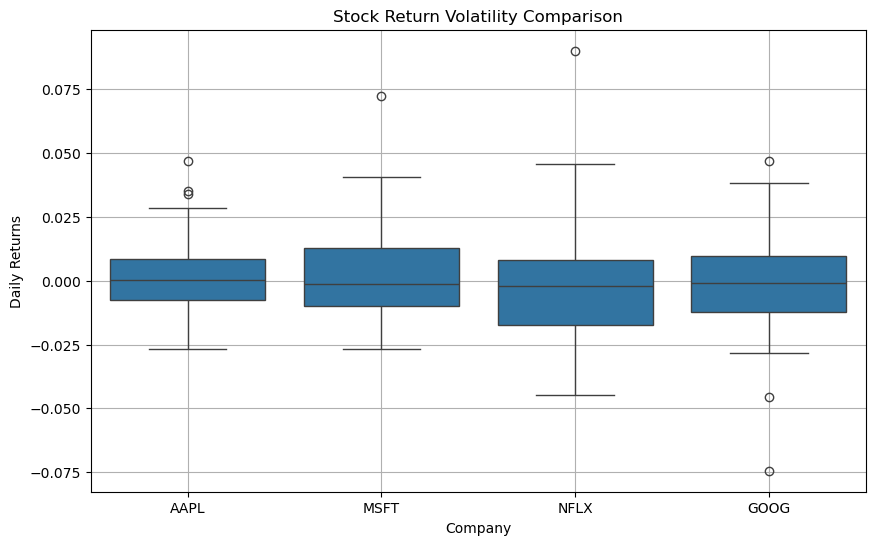

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Ticker", y="Daily Return", data=data)
plt.title("Stock Return Volatility Comparison")
plt.xlabel("Company")
plt.ylabel("Daily Returns")
plt.grid(True)


In [28]:
# Creating a pivot table

In [29]:
returns_pivot = data.pivot(index='Date', columns='Ticker', values='Daily Return')
returns_pivot.head()

Ticker,AAPL,GOOG,MSFT,NFLX
Date,,,,
2023-02-08,-0.017653,-0.074417,-0.003102,0.010690
2023-02-09,-0.006912,-0.045400,-0.011660,-0.011804
2023-02-10,0.000928,-0.006285,-0.001972,-0.041766
2023-02-13,0.018807,0.001476,0.031243,0.032272
2023-02-14,-0.004225,-0.000526,0.003133,0.003876


In [30]:
# Calculating correlation matrix

In [31]:
correlation_matrix = returns_pivot.corr()
correlation_matrix

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,1.000000,0.644430,0.568690,0.508072
GOOG,0.644430,1.000000,0.516622,0.404993
MSFT,0.568690,0.516622,1.000000,0.432184
NFLX,0.508072,0.404993,0.432184,1.000000


In [32]:
# Visualising using a heatmap

Text(0.5, 1.0, 'Stock Returns Correlation Matrix')

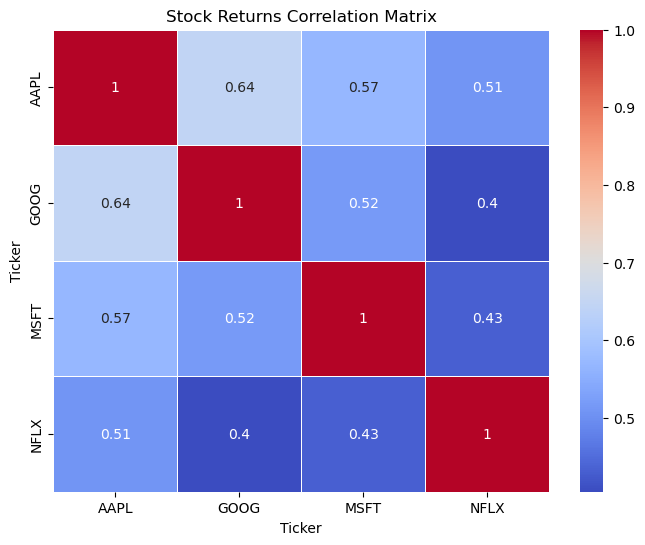

In [33]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Stock Returns Correlation Matrix")

In [34]:
num_stocks = len(data["Ticker"].unique()) 

In [35]:
num_stocks

4

In [36]:
# Generating random weights and normalising the sum to 1

In [37]:
weights = np.random.random(num_stocks)

In [38]:
weights /= np.sum(weights)

In [39]:
print("Portfolio weights : ", weights)

Portfolio weights :  [0.16755668 0.15741278 0.41224678 0.26278375]


In [40]:
# portfolio returns

In [41]:
mean_daily_returns = returns_pivot.mean()

In [42]:
mean_daily_returns

Ticker
AAPL    0.001991
GOOG   -0.000067
MSFT    0.002606
NFLX   -0.001676
dtype: float64

In [43]:
portfolio_return = np.dot(weights, mean_daily_returns)

In [44]:
print("Expected portfolio returns =", portfolio_return)

Expected portfolio returns = 0.0009569095985399093


In [45]:
# portfolio risk

In [46]:
cov_matrix = returns_pivot.cov() # # Cov matrix returns the relation between two stocks if they are travelling together or inversely

In [47]:
cov_matrix # +ve - stocks move together - more risk in portfolio ; -ve - move opposite - not risky; 0 - are indipendent - no effect

Ticker,AAPL,GOOG,MSFT,NFLX
Ticker,,,,
AAPL,0.000200,0.000189,0.000144,0.000162
GOOG,0.000189,0.000429,0.000191,0.000189
MSFT,0.000144,0.000191,0.000320,0.000174
NFLX,0.000162,0.000189,0.000174,0.000505


In [48]:
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

In [49]:
print("Portfolio volatility(Risk) = ",portfolio_volatility)

Portfolio volatility(Risk) =  0.01508769675805897


In [50]:
# Sharpe ratio

In [51]:
risk_free_rate = 0.01

In [52]:
sharpe_ratio = (portfolio_return - risk_free_rate)/portfolio_volatility

In [53]:
print("Sharpe ratio = ",sharpe_ratio)

Sharpe ratio =  -0.5993685150538168


In [54]:
# Finding optimal portfolio

In [109]:
num_portfolios = 10000

In [127]:
p_weights = np.random.random((num_portfolios,4))

In [129]:
p_weights # Each row is different portfolio; Each column is a weight

array([[2.68925254e-01, 6.79549283e-01, 1.09612609e-01, 9.66539933e-01],
       [6.57325269e-01, 4.69116485e-01, 8.94798602e-01, 1.93928862e-01],
       [5.78355823e-01, 9.35084029e-01, 4.06213981e-01, 7.35218203e-01],
       ...,
       [2.24857834e-01, 6.88882034e-01, 5.31244638e-01, 2.04386453e-01],
       [4.62911213e-01, 3.21564636e-01, 8.38762091e-04, 3.65047725e-01],
       [4.77355584e-01, 8.43982543e-01, 3.00514075e-01, 4.56747658e-02]])

In [131]:
p_weights /= np.sum(port_weights, axis=1, keepdims=True) # we are adding all elements of a row using axis 1 and using keepdims we are keeping the dimension as it is without it being reduced

In [133]:
p_weights # normalised

array([[2.68925254e-01, 6.79549283e-01, 1.09612609e-01, 9.66539933e-01],
       [6.57325269e-01, 4.69116485e-01, 8.94798602e-01, 1.93928862e-01],
       [5.78355823e-01, 9.35084029e-01, 4.06213981e-01, 7.35218203e-01],
       ...,
       [2.24857834e-01, 6.88882034e-01, 5.31244638e-01, 2.04386453e-01],
       [4.62911213e-01, 3.21564636e-01, 8.38762091e-04, 3.65047725e-01],
       [4.77355584e-01, 8.43982543e-01, 3.00514075e-01, 4.56747658e-02]])

In [135]:
p_return = np.dot(p_weights, mean_daily_returns)

In [137]:
p_return

array([-0.0008445 ,  0.00328436,  0.00091535, ...,  0.00144351,
        0.00029062,  0.0016008 ])

In [161]:
p_volatility = np.sqrt(np.einsum("ij,jk,ik->i", p_weights, cov_matrix, p_weights)) # verify einsum (used for summations over multiple dimensions)

In [163]:
p_volatility

array([0.0341044 , 0.03221999, 0.04105785, ..., 0.02576087, 0.01760895,
       0.02641899])

In [151]:
p_sharpe_ratios = (p_return - risk_free_rate)/p_volatality

In [153]:
p_sharpe_ratios

array([-0.31797954, -0.20843084, -0.2212646 , ..., -0.33215069,
       -0.55138866, -0.31792272])

In [165]:
max_sharpe_idx = np.argmax(p_sharpe_ratios)
min_risk_idx = np.argmin(p_volatility)

In [167]:
max_sharpe_idx

8427

In [169]:
min_risk_idx

695

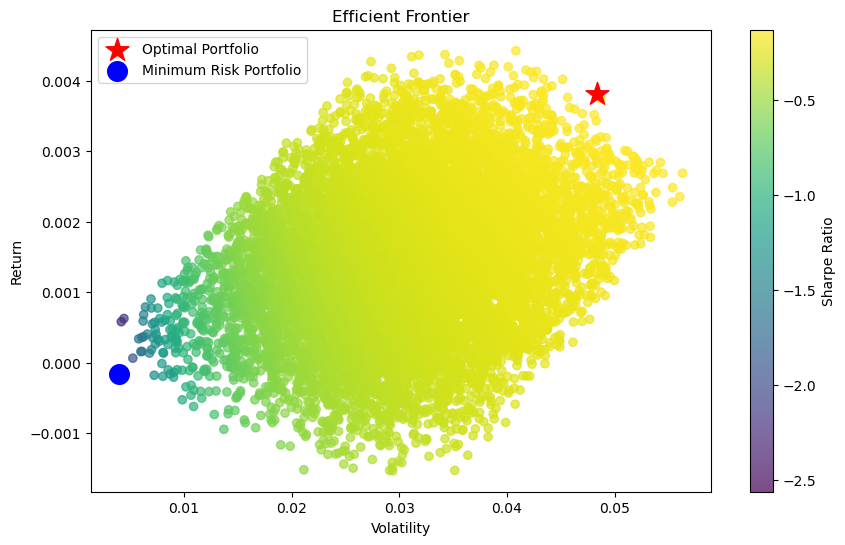

In [171]:
plt.figure(figsize=(10, 6))
plt.scatter(p_volatility, p_return, c=p_sharpe_ratios, cmap='viridis', alpha=0.7)
plt.colorbar(label='Sharpe Ratio')

plt.scatter(p_volatility[max_sharpe_idx], p_return[max_sharpe_idx], 
            color='red', marker='*', s=300, label="Optimal Portfolio")
plt.scatter(p_volatility[min_risk_idx], p_return[min_risk_idx], 
            color='blue', marker='o', s=200, label="Minimum Risk Portfolio")

plt.xlabel('Volatility')
plt.ylabel('Return')
plt.title('Efficient Frontier')
plt.legend()
plt.show()

In [197]:
# Finding Tangency Portfolio ( balance between high sharpe rate and low risk)

In [175]:
excess_returns = mean_daily_returns - risk_free_rate

In [177]:
inv_cov_matrix = np.linalg.inv(cov_matrix)

In [183]:
t_weights = inv_cov_matrix @ excess_returns # @ - used for matrix multiplication
t_weights /= np.sum(t_weights)  # Normalize weights to sum to 1

In [187]:
t_return = np.dot(t_weights, mean_daily_returns)
t_volatility = np.sqrt(t_weights @ cov_matrix @ tangency_weights)


In [189]:
t_sharpe_ratio = (t_return - risk_free_rate) / t_volatility

In [193]:
print("Tangency Portfolio Weights:", t_weights)
print("Tangency Portfolio Return:", t_return)
print("Tangency Portfolio Volatility:", t_volatility)
print("Tangency Portfolio Sharpe Ratio:", t_sharpe_ratio)

Tangency Portfolio Weights: [0.47814124 0.17680322 0.05031081 0.29474472]
Tangency Portfolio Return: 0.0005773999698461357
Tangency Portfolio Volatility: 0.014715365874465364
Tangency Portfolio Sharpe Ratio: -0.6403238703364014
